In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

'''
# data preprocessing step
'''
pd.set_option('display.width', 200) # for display width

# 1. read data config(*.csv) file
# [note] *.xlsx must be converted to csv format because of the *.xlsx format does not support
data_config = pd.read_csv('./data/train/data_config.csv', header=0, index_col=0)
print("***** data configurations *****")
print("- config data shape : ", data_config.shape)

# 2. read all data logs (FSR matrix, Seat Sensor Data)
fsr_matrix_data = {}
seat_data = {}

for idx in data_config.index:
    fsr_filepath = './data/train/'+data_config.loc[idx, "fsr_matrix_1d_datafile"]
    seat_filepath = './data/train/'+data_config.loc[idx, "seat_datafile"]
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    tmp_fsr_data = pd.read_csv(fsr_filepath, header=0, index_col=False)
    tmp_seat_data = pd.read_csv(seat_filepath, header=0, index_col=False)
    fsr_matrix_data[idx] = tmp_fsr_data.iloc[:,0:] # slice by the end of column
    seat_data[idx] = tmp_seat_data

***** data configurations *****
- config data shape :  (19, 12)
1 ) read data files :  ./data/train/20210303T160024-1dm.csv , ./data/train/data_01m.csv
2 ) read data files :  ./data/train/20210310T104529-1dm.csv , ./data/train/data_02m.csv
3 ) read data files :  ./data/train/20210310T110616-1dm.csv , ./data/train/data_03m.csv
4 ) read data files :  ./data/train/20210318T170103-1dm.csv , ./data/train/data_04m.csv
5 ) read data files :  ./data/train/20210310T153307-1dm.csv , ./data/train/data_05m.csv
6 ) read data files :  ./data/train/20210310T154900-1dm.csv , ./data/train/data_06m.csv
7 ) read data files :  ./data/train/20210311T131751-1dm.csv , ./data/train/data_07m.csv
8 ) read data files :  ./data/train/20210311T134516-1dm.csv , ./data/train/data_08m.csv
9 ) read data files :  ./data/train/20210311T150952-1dm.csv , ./data/train/data_09m.csv
10 ) read data files :  ./data/train/20210311T153746-1dm.csv , ./data/train/data_10m.csv
11 ) read data files :  ./data/train/20210311T154809-1d

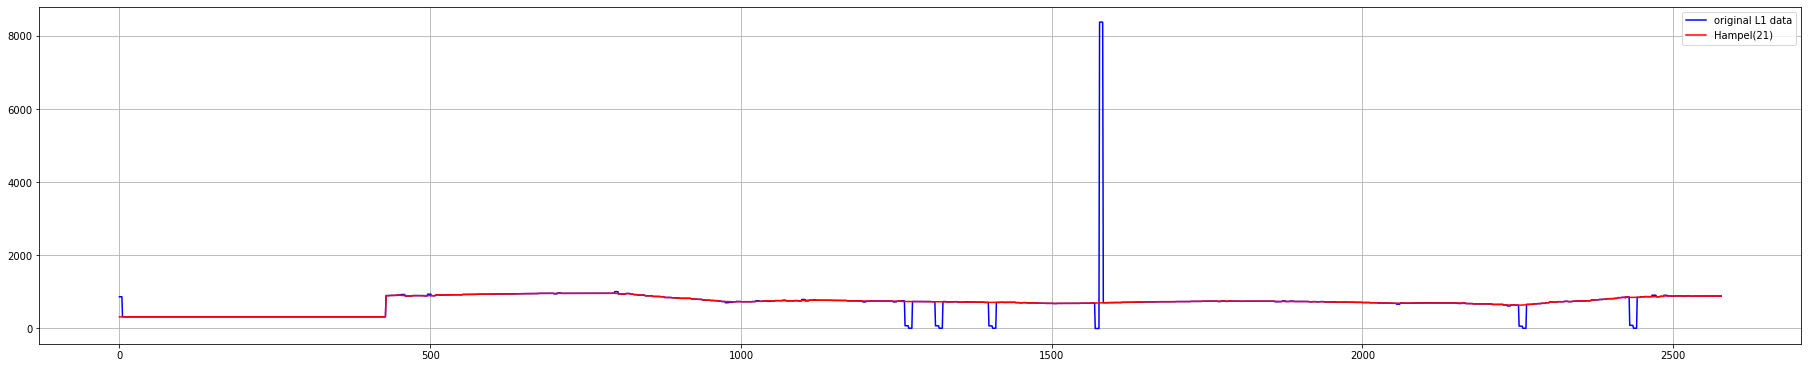

0       869
1       869
2       869
3       869
4       869
       ... 
2573    886
2574    886
2575    886
2576    886
2577    887
Name: Seat L1, Length: 2578, dtype: int64
0       318.0
1       318.0
2       318.0
3       318.0
4       318.0
        ...  
2573    886.0
2574    886.0
2575    886.0
2576    886.0
2577    887.0
Name: Seat L1, Length: 2578, dtype: float64
[318. 318. 318. ... 886. 886. 886.]


In [2]:
# hampel filtering
from hampel import hampel
from scipy.signal import medfilt

idx = 1

seat_loadcell = seat_data[idx].loc[:,["Seat L1", "Seat L2", "Seat L3", "Seat L4"]]

# outlier detection
#outlier_indices = hampel(seat_loadcell["Seat L1"], window_size=5, n=3)
#print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation = hampel(seat_loadcell["Seat L1"], window_size=21, n=1, imputation=True)
ts_median = medfilt(seat_loadcell["Seat L1"].values, 21)

plt.figure(figsize=(25,5), constrained_layout=True)
plt.plot(seat_loadcell["Seat L1"], 'b', label='original L1 data')
plt.plot(ts_imputation, 'r', label='Hampel(21)')
#plt.plot(ts_median, 'g', label='Median(21)')

plt.legend()
plt.grid()
plt.show()

print(seat_loadcell["Seat L1"])
print(ts_imputation)
print(ts_median)
